In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dose_response_df = pd.read_csv('../data/v17.3_fitted_dose_response.csv', index_col='IC50_RESULTS_ID')

In [18]:
dose_response_df.head()

,DATASET_VERSION,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
IC50_RESULTS_ID,,,,,,,,,,,,
1,17.3,683665,MC-CAR,1,Erlotinib,EGFR,2.0,0.007812,2.453524,0.982610,0.021678,-0.015505
1482,17.3,684055,ES3,1,Erlotinib,EGFR,2.0,0.007812,3.376592,0.985169,0.029915,0.779999
1791,17.3,684057,ES5,1,Erlotinib,EGFR,2.0,0.007812,3.614664,0.983207,0.031201,0.985170
2177,17.3,684059,ES7,1,Erlotinib,EGFR,2.0,0.007812,3.223394,0.984574,0.093857,0.647971
2754,17.3,684062,EW-11,1,Erlotinib,EGFR,2.0,0.007812,2.486405,0.946034,0.087280,0.012832


In [4]:
pathway_drug_ids =      [   5,    6,   30,   34,   35,   37,   38,  155,  193,  199,  254,
        277,  281,  298,  304,  308,  312, 1021, 1023, 1029, 1049, 1194]

In [6]:
rtk_resp = dose_response_df[dose_response_df['DRUG_ID'].isin(pathway_drug_ids)]

In [7]:
rtk_resp.count()

DATASET_VERSION        17157
COSMIC_ID              17157
CELL_LINE_NAME         17157
DRUG_ID                17157
DRUG_NAME              17157
PUTATIVE_TARGET        17157
MAX_CONC_MICROMOLAR    17157
MIN_CONC_MICROMOLAR    17157
LN_IC50                17157
AUC                    17157
RMSE                   17157
Z_SCORE                17157
dtype: int64

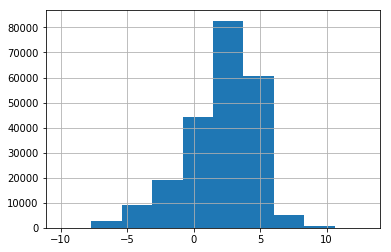

In [5]:
dose_response_df['LN_IC50'].hist()

In [6]:
print(len(dose_response_df['PUTATIVE_TARGET'].unique()))

202


In [7]:
# some value checks

print(len(dose_response_df['COSMIC_ID'].unique()))
print(len(dose_response_df['CELL_LINE_NAME'].unique()))
print(dose_response_df.count())

1065
1065
DATASET_VERSION        224202
COSMIC_ID              224202
CELL_LINE_NAME         224202
DRUG_ID                224202
DRUG_NAME              224202
PUTATIVE_TARGET        224202
MAX_CONC_MICROMOLAR    224202
MIN_CONC_MICROMOLAR    224202
LN_IC50                224202
AUC                    224202
RMSE                   224202
Z_SCORE                224202
dtype: int64


In [8]:
dose_response_df.describe()

,DATASET_VERSION,COSMIC_ID,DRUG_ID,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
count,2.242020e+05,2.242020e+05,224202.000000,224202.000000,224202.000000,224202.000000,224202.000000,224202.000000,2.242020e+05
mean,1.730000e+01,9.910390e+05,574.022685,51.136400,0.198738,2.108974,0.843302,0.078491,-4.326456e-10
std,6.778238e-11,2.206914e+05,468.873175,385.633652,1.506492,2.687759,0.194401,0.052955,9.994088e-01
min,1.730000e+01,6.836650e+05,1.000000,0.008000,0.000031,-9.991409,0.003390,0.001793,-9.561461e+00
25%,1.730000e+01,9.068050e+05,199.000000,2.560000,0.009766,0.662618,0.784594,0.035752,-6.407060e-01
50%,1.730000e+01,9.097200e+05,293.000000,10.000000,0.031250,2.545984,0.928997,0.064146,3.300400e-02
75%,1.730000e+01,1.240154e+06,1042.000000,10.240000,0.040000,4.032219,0.977479,0.108132,6.801902e-01
max,1.730000e+01,2.164691e+06,1530.000000,4000.000000,15.625000,12.900156,0.999946,0.299938,5.255236e+00


In [9]:
print(len(dose_response_df['CELL_LINE_NAME'].unique()))

1065


In [10]:
print(dose_response_df['CELL_LINE_NAME'].unique())

['MC-CAR' 'ES3' 'ES5' ... 'NCI-H1650' 'H2810' 'COR-L32']


In [11]:
dose_by_drug_df = dose_response_df.groupby(['DRUG_ID'])
dose_by_drug_df.head()

,DATASET_VERSION,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
IC50_RESULTS_ID,,,,,,,,,,,,
1,17.3,683665,MC-CAR,1,Erlotinib,EGFR,2.0000,0.007812,2.453524,0.982610,0.021678,-0.015505
1482,17.3,684055,ES3,1,Erlotinib,EGFR,2.0000,0.007812,3.376592,0.985169,0.029915,0.779999
1791,17.3,684057,ES5,1,Erlotinib,EGFR,2.0000,0.007812,3.614664,0.983207,0.031201,0.985170
2177,17.3,684059,ES7,1,Erlotinib,EGFR,2.0000,0.007812,3.223394,0.984574,0.093857,0.647971
2754,17.3,684062,EW-11,1,Erlotinib,EGFR,2.0000,0.007812,2.486405,0.946034,0.087280,0.012832
2,17.3,683665,MC-CAR,3,Rapamycin,MTORC1,0.1000,0.000391,-0.605979,0.981316,0.031644,0.824852
1483,17.3,684055,ES3,3,Rapamycin,MTORC1,0.1000,0.000391,0.121827,0.981284,0.073895,1.172477
1792,17.3,684057,ES5,3,Rapamycin,MTORC1,0.1000,0.000391,0.610943,0.983097,0.032647,1.406095
2178,17.3,684059,ES7,3,Rapamycin,MTORC1,0.1000,0.000391,0.008208,0.981110,0.065864,1.118209


In [12]:
dose_response_df.sort_values('COSMIC_ID').head(100)

,DATASET_VERSION,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
IC50_RESULTS_ID,,,,,,,,,,,,
1,17.3,683665,MC-CAR,1,Erlotinib,EGFR,2.0000,0.007812,2.453524,0.982610,0.021678,-0.015505
228,17.3,683665,MC-CAR,1143,HG-5-88-01,"EGFR, ADCK4",10.0000,0.039062,3.401213,0.964035,0.095435,0.114689
229,17.3,683665,MC-CAR,1149,TW 37,"BCL2, BCL-XL, MCL1",5.0000,0.019531,-1.782843,0.396771,0.064549,-1.021536
59,17.3,683665,MC-CAR,164,JQ12,"HDAC1, HDAC2",5.1200,0.020000,-0.081223,0.674044,0.050431,-0.796175
230,17.3,683665,MC-CAR,1158,XMD11-85h,"BRSK2, FLT4, MARK4, PRKCD, RET, SPRK1",10.0000,0.039062,2.431612,0.906672,0.071607,-1.520882
58,17.3,683665,MC-CAR,163,JQ1,"BRD2, BRD3, BRD4, BRDT",2.5600,0.010000,-0.846454,0.662614,0.072581,-0.715919
231,17.3,683665,MC-CAR,1161,ZG-10,JNK1,10.0000,0.039062,0.314144,0.630115,0.173852,-0.979763
232,17.3,683665,MC-CAR,1164,XMD8-92,MAPK7,10.0000,0.039062,1.772578,0.840464,0.039075,-1.284605
57,17.3,683665,MC-CAR,159,HG6-64-1,BRAF,5.1200,0.020000,0.513466,0.763621,0.041911,-0.310852


In [13]:
mc_car_cell_line_df = dose_response_df[dose_response_df['CELL_LINE_NAME'] == 'BHY']

In [6]:
dose_response_df[dose_response_df.LN_IC50 == np.NaN]

,DATASET_VERSION,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
IC50_RESULTS_ID,,,,,,,,,,,,


In [15]:
print(mc_car_cell_line_df.count())
mc_car_cell_line_df.sort_values('DRUG_ID').head(300)

DATASET_VERSION        193
COSMIC_ID              193
CELL_LINE_NAME         193
DRUG_ID                193
DRUG_NAME              193
PUTATIVE_TARGET        193
MAX_CONC_MICROMOLAR    193
MIN_CONC_MICROMOLAR    193
LN_IC50                193
AUC                    193
RMSE                   193
Z_SCORE                193
dtype: int64


,DATASET_VERSION,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
IC50_RESULTS_ID,,,,,,,,,,,,
52497,17.3,753535,BHY,133,Doxorubicin,Anthracycline,1.024,0.004000,-3.460530,0.387838,0.089187,-1.036646
52498,17.3,753535,BHY,134,Etoposide,TOP2,16.000,0.062500,0.500860,0.579320,0.038982,-0.553541
52499,17.3,753535,BHY,135,Gemcitabine,Pyrimidine antimetabolite,1.024,0.004000,-4.969998,0.180305,0.097458,-0.993080
52500,17.3,753535,BHY,136,Mitomycin-C,DNA crosslinker,16.000,0.062500,-2.727565,0.128401,0.076244,-1.256444
52501,17.3,753535,BHY,140,Vinorelbine,Microtubule destabiliser,0.064,0.000250,-4.539676,0.653388,0.079158,-0.458395
52502,17.3,753535,BHY,147,NSC-87877,"SHP-1 (PTPN6), SHP-2 (PTPN11)",16.000,0.062500,5.347997,0.986812,0.048125,0.468620
52503,17.3,753535,BHY,150,Bicalutamide,AR,1.024,0.004000,2.336088,0.983028,0.063242,-0.475625
52504,17.3,753535,BHY,151,QS11,ARFGAP1,10.240,0.040000,1.687381,0.809642,0.090899,-1.143662
52505,17.3,753535,BHY,152,CP466722,ATM,16.000,0.062500,2.115067,0.807464,0.038236,-0.368783


In [ ]:
#pathway_ds = sns.load_dataset(drug_df)
#pathway = pathway_ds.pop("TARGET_PATHWAY")

sns.clustermap(drug_df)



In [6]:
drug_df = pd.read_csv('../data/Screened_Compounds_WT.csv', index_col='DRUG_ID')
drug_df.head()

,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY,THRESHOLD
DRUG_ID,,,,,
1,Erlotinib,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",EGFR,EGFR signaling,1.56710
3,Rapamycin,"AY-22989, Sirolimus, WY-090217, Torisel, Rapamune",MTORC1,PI3K/MTOR signaling,-3.63950
5,Sunitinib,"Sutent, Sunitinib Malate, SU-11248","PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling,0.50064
6,PHA-665752,"PHA665752, PHA 665752",MET,RTK signaling,1.90640
9,MG-132,"LLL cpd, MG 132, MG132","Proteasome, CAPN1",Protein stability and degradation,-2.00530


In [21]:
dose_response_df.head()

,DATASET_VERSION,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
IC50_RESULTS_ID,,,,,,,,,,,,
1,17.3,683665,MC-CAR,1,Erlotinib,EGFR,2.0,0.007812,2.453524,0.982610,0.021678,-0.015505
1482,17.3,684055,ES3,1,Erlotinib,EGFR,2.0,0.007812,3.376592,0.985169,0.029915,0.779999
1791,17.3,684057,ES5,1,Erlotinib,EGFR,2.0,0.007812,3.614664,0.983207,0.031201,0.985170
2177,17.3,684059,ES7,1,Erlotinib,EGFR,2.0,0.007812,3.223394,0.984574,0.093857,0.647971
2754,17.3,684062,EW-11,1,Erlotinib,EGFR,2.0,0.007812,2.486405,0.946034,0.087280,0.012832


In [19]:
drug_df.count()

DRUG_NAME         267
SYNONYMS          220
TARGET            267
TARGET_PATHWAY    267
THRESHOLD         264
dtype: int64

In [26]:
for row in dose_response_df.itertuples():
    
    drug_id = row[4]
    drug_threshold = drug_df.at[drug_id, 'THRESHOLD']

    if drug_threshold:
        binary_resposne = "R"
        
        if drug_threshold >= row[9]:
            binary_resposne = "S"
    
        dose_response_df.loc[row.Index,"BINARY_RESPONSE"] = binary_resposne
        #row["BINARY_RESPONSE"] = binary_resposne

In [27]:
dose_response_df.head(100)

,DATASET_VERSION,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE,BINARY_RESPONSE
IC50_RESULTS_ID,,,,,,,,,,,,,
1,17.3,683665,MC-CAR,1,Erlotinib,EGFR,2.0,0.007812,2.453524,0.982610,0.021678,-0.015505,R
1482,17.3,684055,ES3,1,Erlotinib,EGFR,2.0,0.007812,3.376592,0.985169,0.029915,0.779999,R
1791,17.3,684057,ES5,1,Erlotinib,EGFR,2.0,0.007812,3.614664,0.983207,0.031201,0.985170,R
2177,17.3,684059,ES7,1,Erlotinib,EGFR,2.0,0.007812,3.223394,0.984574,0.093857,0.647971,R
2754,17.3,684062,EW-11,1,Erlotinib,EGFR,2.0,0.007812,2.486405,0.946034,0.087280,0.012832,R
3333,17.3,684072,SK-ES-1,1,Erlotinib,EGFR,2.0,0.007812,2.048918,0.951604,0.015758,-0.364196,R
3878,17.3,684681,NCI-H1395,1,Erlotinib,EGFR,2.0,0.007812,4.198994,0.982545,0.029594,1.488747,R
4337,17.3,687448,COLO-829,1,Erlotinib,EGFR,2.0,0.007812,3.101688,0.952900,0.179313,0.543086,R
8856,17.3,687562,8-MG-BA,1,Erlotinib,EGFR,2.0,0.007812,2.580268,0.980663,0.041394,0.093723,R


In [28]:
dose_response_df.to_csv('../data/v17.3_fitted_dose_response_binary.csv')

In [2]:
drb_df = pd.read_csv('../data/v17.3_fitted_dose_response_binary.csv', index_col='IC50_RESULTS_ID')

In [4]:
drb_df.count()

DATASET_VERSION        224202
COSMIC_ID              224202
CELL_LINE_NAME         224202
DRUG_ID                224202
DRUG_NAME              224202
PUTATIVE_TARGET        224202
MAX_CONC_MICROMOLAR    224202
MIN_CONC_MICROMOLAR    224202
LN_IC50                224202
AUC                    224202
RMSE                   224202
Z_SCORE                224202
BINARY_RESPONSE        224202
dtype: int64

In [8]:
cell_line_df = pd.read_csv('../data/Cell_Lines_Details.csv')

In [9]:
cell_line_df.head()

,Sample Name,COSMIC_ID,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


In [10]:
joined_drig_cell = pd.merge(cell_line_df, drb_df, on='COSMIC_ID')

In [15]:
joined_drug_cell = joined_drig_cell.rename(columns={'Cancer Type\n(matching TCGA label)': 'TCGA_LABEL'})

In [34]:
drb_df.count()

DATASET_VERSION        224202
COSMIC_ID              224202
CELL_LINE_NAME         224202
DRUG_ID                224202
DRUG_NAME              224202
PUTATIVE_TARGET        224202
MAX_CONC_MICROMOLAR    224202
MIN_CONC_MICROMOLAR    224202
LN_IC50                224202
AUC                    224202
RMSE                   224202
Z_SCORE                224202
BINARY_RESPONSE        224202
dtype: int64

In [33]:
joined_drug_cell.count()

Sample Name                                  213365
COSMIC_ID                                    213365
Whole Exome Sequencing (WES)                 213365
Copy Number Alterations (CNA)                213365
Gene Expression                              213365
Methylation                                  213365
Drug\nResponse                               213365
GDSC\nTissue descriptor 1                    213365
GDSC\nTissue\ndescriptor 2                   213365
TCGA_LABEL                                   175517
Microsatellite \ninstability Status (MSI)    210794
Screen Medium                                213365
Growth Properties                            213365
DATASET_VERSION                              213365
CELL_LINE_NAME                               213365
DRUG_ID                                      213365
DRUG_NAME                                    213365
PUTATIVE_TARGET                              213365
MAX_CONC_MICROMOLAR                          213365
MIN_CONC_MIC

In [17]:
print(joined_drug_cell['COSMIC_ID'])

0          906794
1          906794
2          906794
3          906794
4          906794
           ...   
213360    1298218
213361    1298218
213362    1298218
213363    1298218
213364    1298218
Name: COSMIC_ID, Length: 213365, dtype: int64


In [13]:
joined_drug_cell.COSMIC_ID = joined_drug_cell.COSMIC_ID.astype(int)

In [19]:
col_list = ['COSMIC_ID','TCGA_LABEL', 'DRUG_ID', 'DRUG_NAME', 'LN_IC50', 'BINARY_RESPONSE']

drug_selection_set = joined_drug_cell[col_list]

In [20]:
drug_selection_set.head()

,COSMIC_ID,TCGA_LABEL,DRUG_ID,DRUG_NAME,LN_IC50,BINARY_RESPONSE
0,906794,NaN,1,Erlotinib,0.290013,S
1,906794,NaN,3,Rapamycin,0.246391,R
2,906794,NaN,5,Sunitinib,4.155240,R
3,906794,NaN,6,PHA-665752,2.904331,R
4,906794,NaN,9,MG-132,-1.696809,R


In [21]:
drug_selection_set.to_csv('../data/drug_selection_matrix.csv')

In [22]:
drug_selection_set.to_json(orient='records', path_or_buf='drug_selection.json')

In [23]:
drug_selection_set.count()

COSMIC_ID          213365
TCGA_LABEL         175517
DRUG_ID            213365
DRUG_NAME          213365
LN_IC50            213365
BINARY_RESPONSE    213365
dtype: int64

In [32]:
drug_selection_set[drug_selection_set.DRUG_ID== 1526]

,COSMIC_ID,TCGA_LABEL,DRUG_ID,DRUG_NAME,LN_IC50,BINARY_RESPONSE
261,906794,NaN,1526,Refametinib,1.670212,R
757,753532,HNSC,1526,Refametinib,-1.407079,S
950,753535,HNSC,1526,Refametinib,1.784652,R
1174,1290724,HNSC,1526,Refametinib,1.752824,R
1388,1240121,HNSC,1526,Refametinib,-0.652268,S
...,...,...,...,...,...,...
211878,908120,BRCA,1526,Refametinib,3.081481,R
212337,905943,NaN,1526,Refametinib,1.328356,R
212560,1298144,SKCM,1526,Refametinib,-0.277525,R
212931,1480367,OV,1526,Refametinib,-0.263564,R


In [31]:
drb_df[drb_df.DRUG_ID ==1526]

,DATASET_VERSION,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE,BINARY_RESPONSE
IC50_RESULTS_ID,,,,,,,,,,,,,
345,17.3,683665,MC-CAR,1526,Refametinib,"MEK1, MEK2",5.0,0.019531,2.015436,0.927652,0.139785,0.174579,R
1249,17.3,684052,A673,1526,Refametinib,"MEK1, MEK2",5.0,0.019531,2.240357,0.940715,0.122523,0.307632,R
1787,17.3,684055,ES3,1526,Refametinib,"MEK1, MEK2",5.0,0.019531,3.244029,0.962662,0.106690,0.901359,R
2137,17.3,684057,ES5,1526,Refametinib,"MEK1, MEK2",5.0,0.019531,4.266746,0.979180,0.083279,1.506354,R
2521,17.3,684059,ES7,1526,Refametinib,"MEK1, MEK2",5.0,0.019531,3.305894,0.967093,0.080029,0.937956,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463497,17.3,1660036,SNU-81,1526,Refametinib,"MEK1, MEK2",5.0,0.019531,0.601297,0.729966,0.110169,-0.661963,R
463797,17.3,1674021,SNU-C5,1526,Refametinib,"MEK1, MEK2",5.0,0.019531,0.329251,0.716963,0.225986,-0.822893,R
464180,17.3,1789883,DIFI,1526,Refametinib,"MEK1, MEK2",5.0,0.019531,0.023130,0.679952,0.035154,-1.003980,R
